In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ============================================
# ANÁLISIS EXPLORATORIO DEL DATASET HHAR
# ============================================

# Mostrar más filas y columnas
pd.set_option('display.max_columns', None)

# ========================
# Cargar el dataset
# ========================
ruta = "Phones_accelerometer.csv"  # Debe estar en la misma carpeta que el notebook
df = pd.read_csv(ruta)

# Vista general
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())


Dimensiones del dataset: (13062475, 10)

Primeras filas:


,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [ ]:
# ========================
# Vista general
# ========================
print("\nInformación general:")
print(df.info())

print("\nDescripción estadística:")
display(df.describe())

# ========================
# Comprobación de valores faltantes
# ========================
print("\nValores faltantes por columna:")
print(df.isnull().sum())



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13062475 entries, 0 to 13062474
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Index          int64  
 1   Arrival_Time   int64  
 2   Creation_Time  int64  
 3   x              float64
 4   y              float64
 5   z              float64
 6   User           object 
 7   Model          object 
 8   Device         object 
 9   gt             object 
dtypes: float64(3), int64(3), object(4)
memory usage: 996.6+ MB
None

Descripción estadística:


,Index,Arrival_Time,Creation_Time,x,y,z
count,1.306248e+07,1.306248e+07,1.306248e+07,1.306248e+07,1.306248e+07,1.306248e+07
mean,1.240761e+05,1.424745e+12,6.807797e+17,-1.704579e+00,1.595409e-01,8.931753e+00
std,9.239057e+04,4.390389e+07,7.116076e+17,3.859088e+00,1.552040e+00,2.262952e+00
min,0.000000e+00,1.424687e+12,4.507724e+11,-3.881207e+01,-2.249512e+01,-1.342387e+01
25%,5.112700e+04,1.424697e+12,5.523131e+13,-4.012682e+00,-6.961212e-01,7.738060e+00
50%,1.037980e+05,1.424778e+12,3.506028e+14,-2.145178e+00,1.532270e-01,9.063251e+00
75%,1.740970e+05,1.424783e+12,1.424778e+18,-1.532270e-01,1.037979e+00,9.921814e+00
max,3.963370e+05,1.424789e+12,1.424791e+18,2.792894e+01,2.080815e+01,3.931801e+01



Valores faltantes por columna:
Index                  0
Arrival_Time           0
Creation_Time          0
x                      0
y                      0
z                      0
User                   0
Model                  0
Device                 0
gt               1783200
dtype: int64


In [7]:
# ========================
# Limpieza de datos
# ========================

# Filtramos filas donde 'gt' (ground truth / actividad) no es nula
df = df.dropna(subset=['gt'])

print("Dataset después de eliminar valores sin etiqueta (gt):", df.shape)
print("Actividades disponibles:", df['gt'].unique())


Dataset después de eliminar valores sin etiqueta (gt): (11279275, 10)
Actividades disponibles: ['stand' 'sit' 'walk' 'stairsup' 'stairsdown' 'bike']


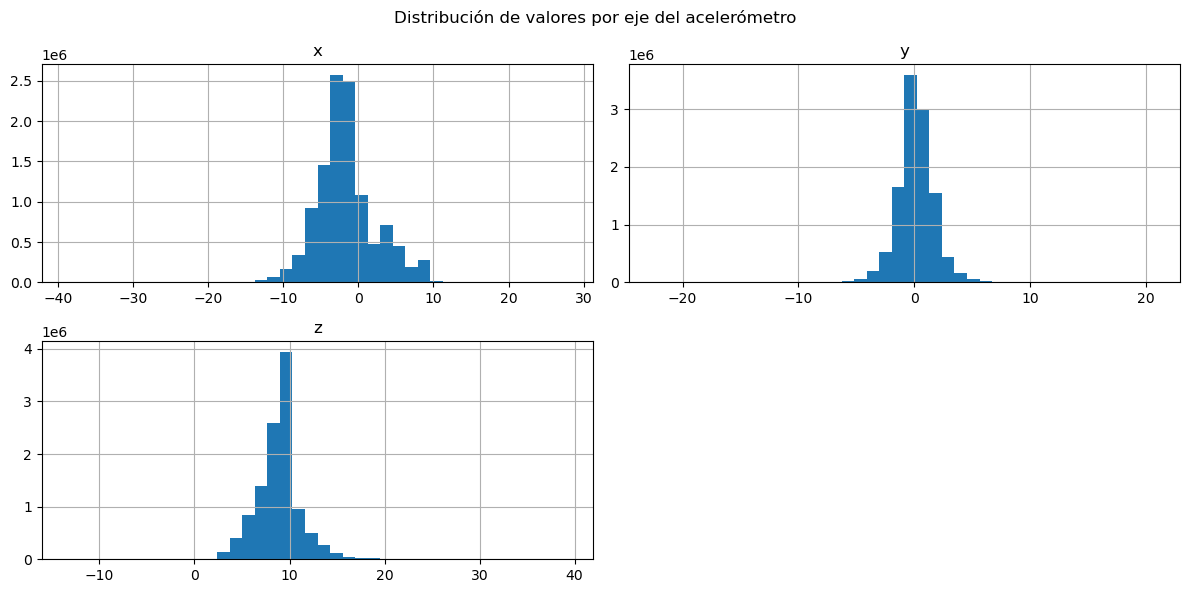

In [ ]:
# ========================
#  Distribución de señales (acelerómetro)
# ========================
ejes = ['x', 'y', 'z']

df[ejes].hist(bins=40, figsize=(12, 6))
plt.suptitle("Distribución de valores por eje del acelerómetro")
plt.tight_layout()
plt.show()


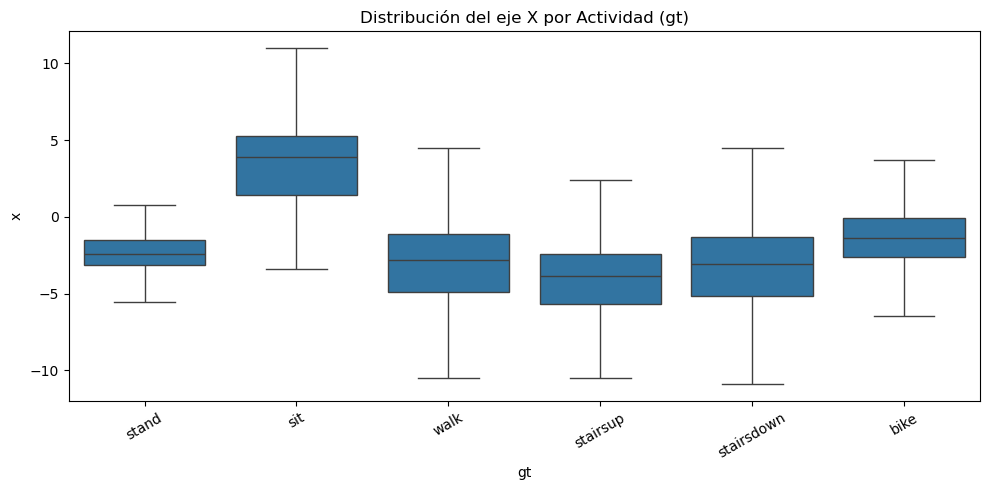

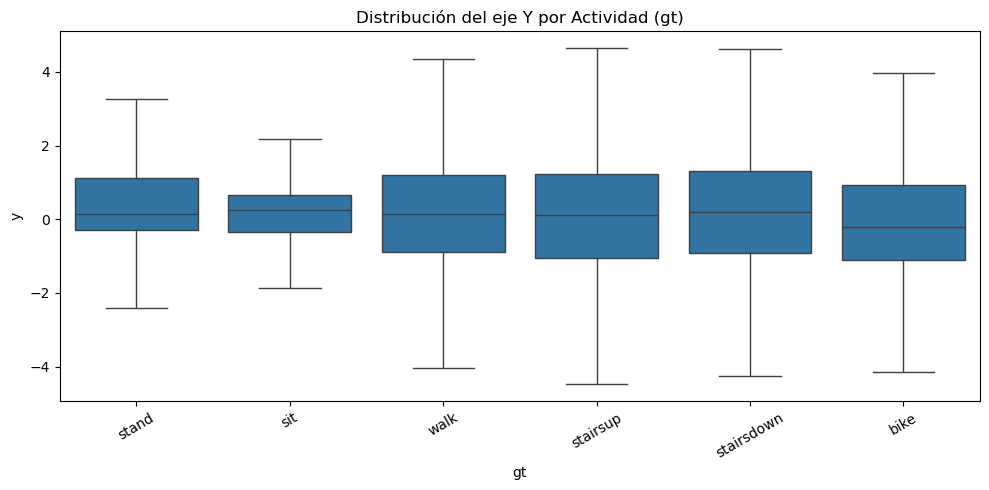

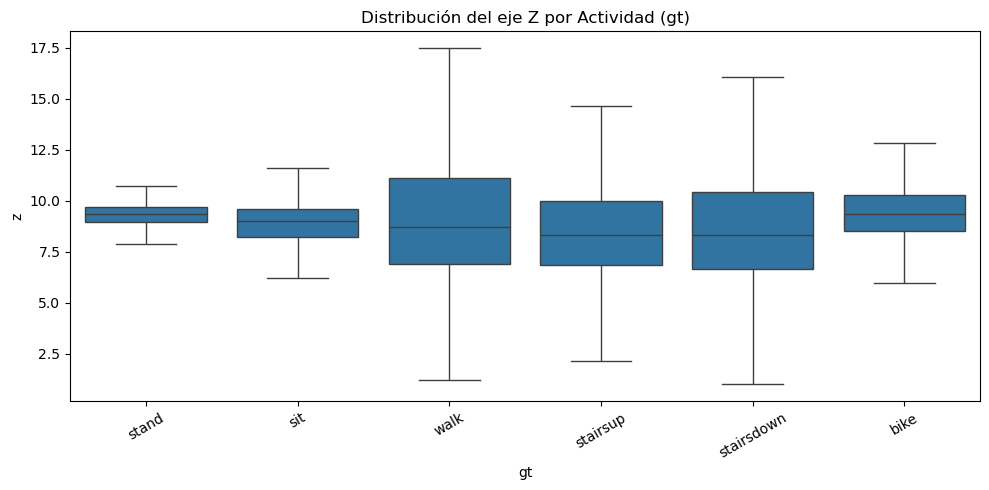

In [ ]:
# ========================
# Boxplots por actividad (gt)
# ========================
for eje in ['x', 'y', 'z']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='gt', y=eje, data=df, showfliers=False)
    plt.title(f"Distribución del eje {eje.upper()} por Actividad (gt)")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


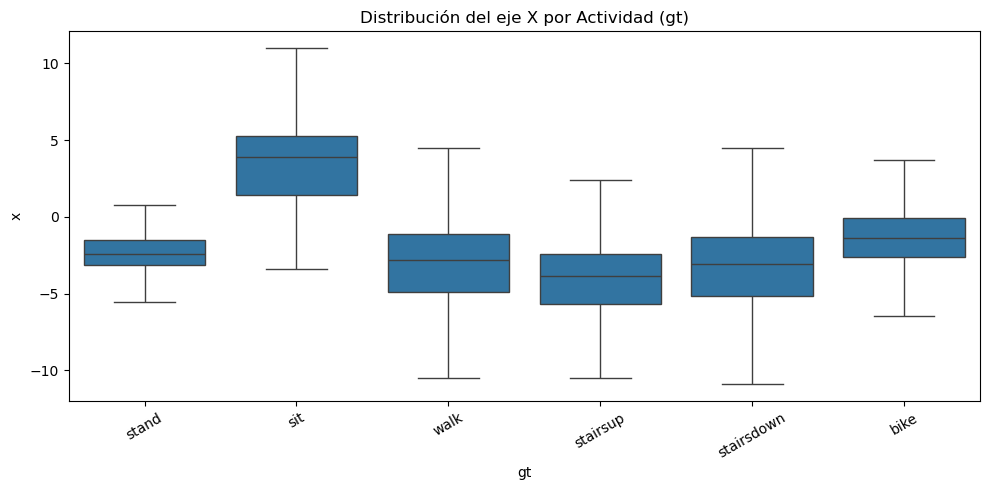

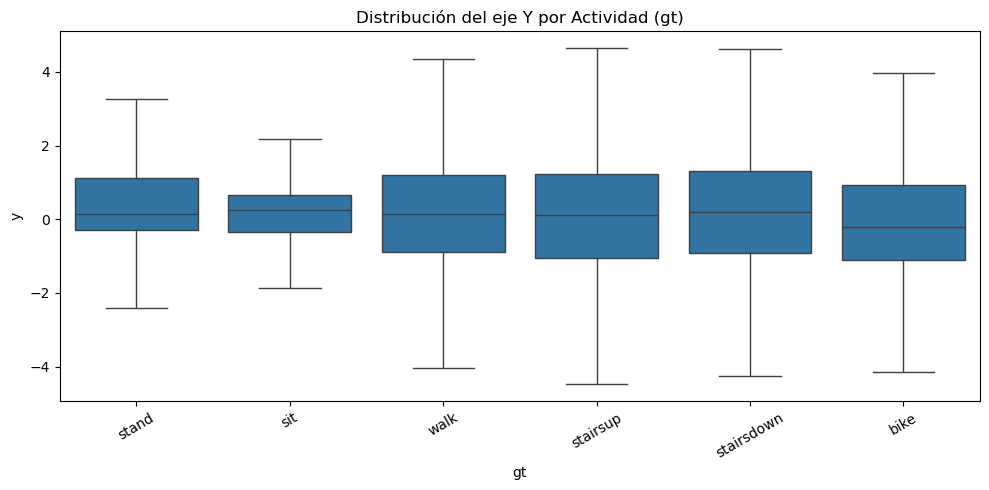

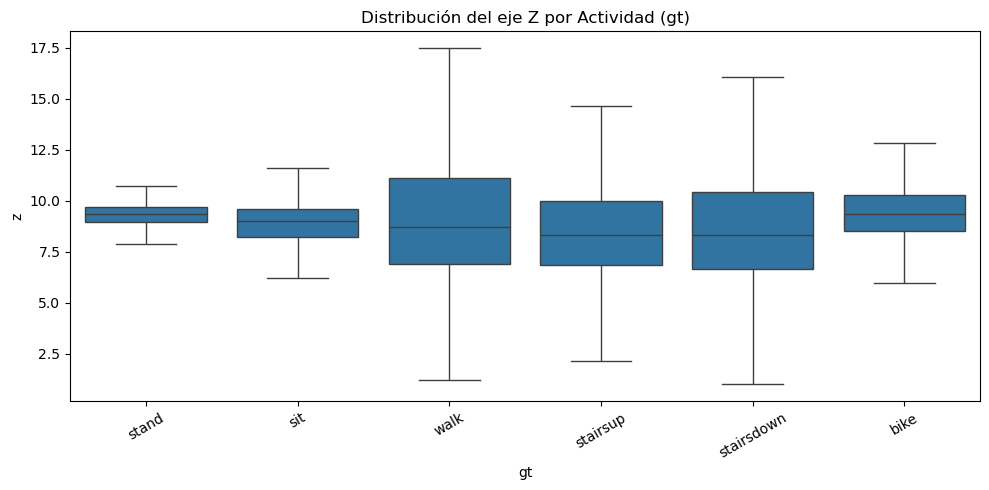

In [ ]:
# ========================
# Boxplots por actividad (gt)
# ========================
for eje in ['x', 'y', 'z']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='gt', y=eje, data=df, showfliers=False)
    plt.title(f"Distribución del eje {eje.upper()} por Actividad (gt)")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

In [ ]:
# ========================
# Resumen general
# ========================
print("\nResumen general del dataset HHAR (Phones_accelerometer.csv):")
print(f"- Total de registros: {len(df)}")
print(f"- Número de usuarios: {df['User'].nunique()}")
print(f"- Modelos distintos: {df['Model'].nunique()}")
print(f"- Dispositivos distintos: {df['Device'].nunique()}")
print(f"- Actividades distintas: {df['gt'].nunique()}")
print(f"- Actividades: {list(df['gt'].unique())}")



Resumen general del dataset HHAR (Phones_accelerometer.csv):
- Total de registros: 11279275
- Número de usuarios: 9
- Modelos distintos: 4
- Dispositivos distintos: 8
- Actividades distintas: 6
- Actividades: ['stand', 'sit', 'walk', 'stairsup', 'stairsdown', 'bike']
